In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import xgboost as xgb 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [43]:
#Realizando leitura da base de dados e iniciando a parte de DATA UNDERSTANDING

df = pd.read_csv('Fraud.csv')

In [44]:
df.shape

(6362620, 11)

In [45]:
df.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4008450,298,PAYMENT,28106.85,C416337209,28359.73,252.88,M605759971,0.00,0.00,0,0
5934317,404,PAYMENT,12708.73,C397601440,0.00,0.00,M1217065940,0.00,0.00,0,0
2081783,182,PAYMENT,8522.54,C785085036,9010.00,487.46,M1236419558,0.00,0.00,0,0
268584,15,CASH_IN,155121.85,C551257767,17125323.18,17280445.02,C178215875,881627.63,988914.07,0,0
3425527,256,CASH_OUT,76689.10,C2040229842,26817.00,0.00,C1341863769,2073729.08,2150418.19,0,0
6053667,495,CASH_IN,83543.55,C2066423232,311756.06,395299.61,C590515599,207707.21,124163.66,0,0
4935447,350,CASH_OUT,241168.39,C504527245,36480.00,0.00,C1806637850,3084485.31,3325653.70,0,0
6242545,595,CASH_OUT,46572.17,C1800818580,19555.00,0.00,C295865329,0.00,46572.17,0,0
3343930,253,PAYMENT,3616.14,C1225042042,31105.00,27488.86,M165992129,0.00,0.00,0,0
2997755,232,PAYMENT,47199.53,C458742914,409220.78,362021.24,M1801119110,0.00,0.00,0,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [47]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<Axes: >

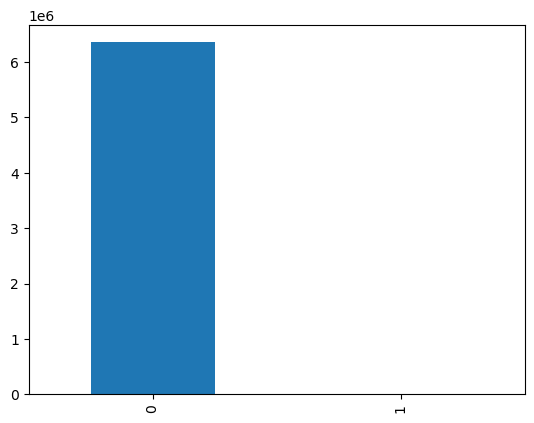

In [48]:
#Analise de balanceamento dos dados

df['isFraud'].value_counts().plot(kind="bar")

In [49]:
nfraude = len(df[df.isFraud == 0])
fraude = len(df[df.isFraud == 1])

print("Transações legítimas: ", nfraude)
print("Transações fraudulentas: ", fraude)
print("% de transações legítimas: {:.4f} %".format((nfraude / (fraude + nfraude)) * 100))
print("% de transações fraudulentas: {:.4f} %".format((fraude / (fraude + nfraude)) * 100))

Transações legítimas:  6354407
Transações fraudulentas:  8213
% de transações legítimas: 99.8709 %
% de transações fraudulentas: 0.1291 %


C:\Users\vinic\AppData\Local\Temp\ipykernel_10200\375539983.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = df.corr()


<Axes: >

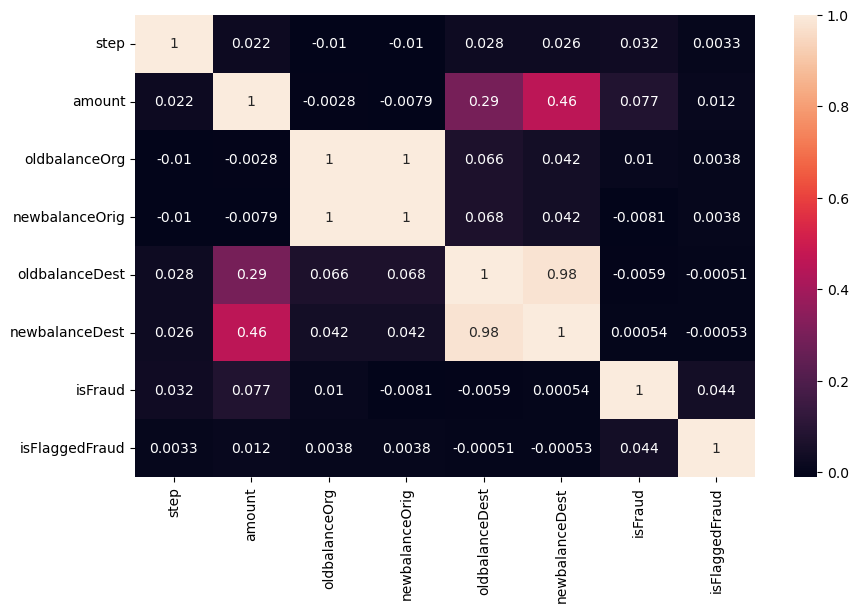

In [50]:
#Analise de correlação dos dados

correlacao = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlacao, annot=True)


In [51]:
# Há uma  correlação forte nas features newbalanceOrig e oldbalanceOrg / newbalanceDest e oldbalanceDest

In [53]:
# Feature type

print(df['type'].value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


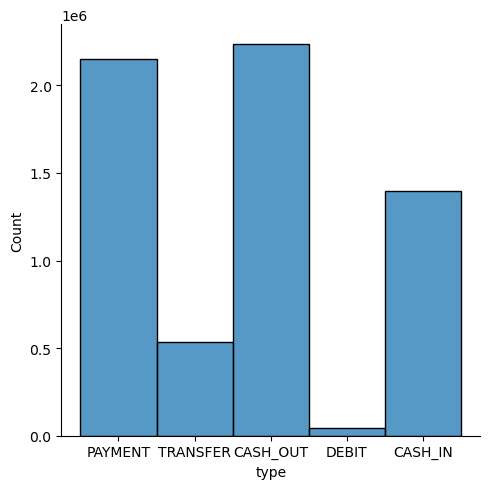

In [54]:
# Tipos de transações na feature "type"

sns.displot(df['type'])

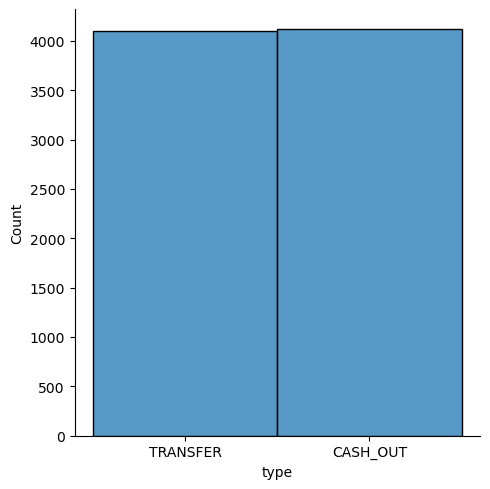

In [55]:
# Tipos de transaçoes na feature type que são classificados como fraudulentos

sns.displot(df['type'].loc[df['isFraud'] == 1])  

In [56]:
# Cópia do Data Frame para aplicar a técnica Dummy
df_dummy = df.copy()

In [57]:
# Aplicando na tecnica Dummy na feature "type"

dummy = pd.get_dummies(df_dummy[['type']])
df_dummy = pd.concat([df_dummy,dummy],axis = 1)

In [58]:
df_dummy.drop(labels='type', axis=1, inplace = True)

In [59]:
#Resultado após tratamento de dados com Dummy

df_dummy.sample(5)

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
5042087,354,332904.51,C314584012,4190610.82,4523515.33,C375168457,357675.32,24770.81,0,0,1,0,0,0,0
349096,17,70371.33,C241719993,0.00,0.00,C1203237364,304592.68,374964.01,0,0,0,1,0,0,0
1593374,156,55838.32,C1678627891,0.00,0.00,C127663131,3983318.75,4039157.07,0,0,0,1,0,0,0
4589756,328,68636.61,C1815432022,31662.00,0.00,M1747216601,0.00,0.00,0,0,0,0,0,1,0
1353334,137,34052.70,C408971382,0.00,0.00,M1923072422,0.00,0.00,0,0,0,0,0,1,0


In [60]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   nameOrig        object 
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   nameDest        object 
 6   oldbalanceDest  float64
 7   newbalanceDest  float64
 8   isFraud         int64  
 9   isFlaggedFraud  int64  
 10  type_CASH_IN    uint8  
 11  type_CASH_OUT   uint8  
 12  type_DEBIT      uint8  
 13  type_PAYMENT    uint8  
 14  type_TRANSFER   uint8  
dtypes: float64(5), int64(3), object(2), uint8(5)
memory usage: 515.8+ MB


In [71]:
# Transformação das features "nameOrig" e "nameDest" através da técnica Label Encoding

objList = df_dummy.select_dtypes(include = "object").columns

print (objList)

le = LabelEncoder()

for i in objList:
    
    df_dummy[i] = le.fit_transform(df_dummy[i].astype(str))

print (df_dummy.info())

Index(['nameOrig', 'nameDest'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   nameOrig        int32  
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   nameDest        int32  
 6   oldbalanceDest  float64
 7   newbalanceDest  float64
 8   isFraud         int64  
 9   isFlaggedFraud  int64  
 10  type_CASH_IN    uint8  
 11  type_CASH_OUT   uint8  
 12  type_DEBIT      uint8  
 13  type_PAYMENT    uint8  
 14  type_TRANSFER   uint8  
dtypes: float64(5), int32(2), int64(3), uint8(5)
memory usage: 467.2 MB
None


In [79]:
 #Retirada as features "newbalanceOrig" e "newbalanceDest", poer terem uma correlação forte
    
    df_dummy = df_dummy.drop(["newbalanceOrig", "newbalanceDest"], axis= 1)

<Axes: >

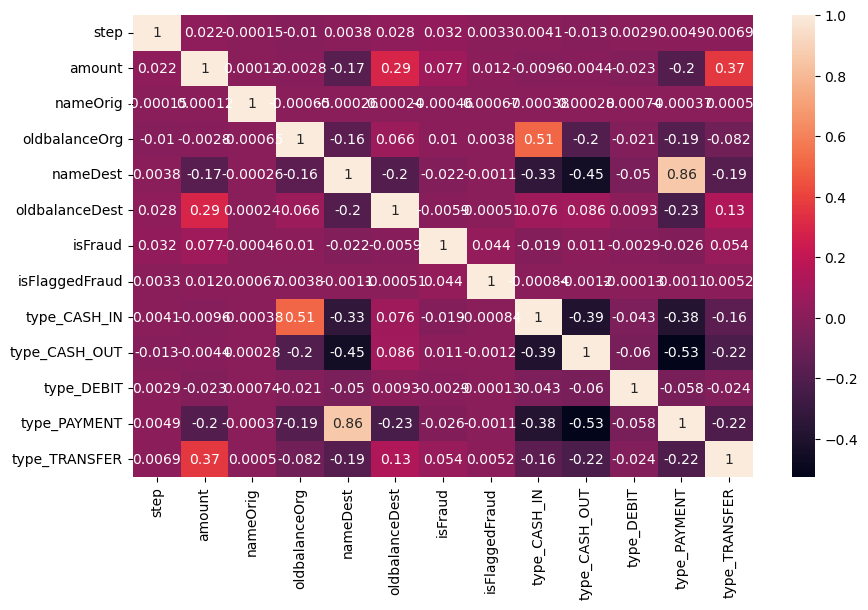

In [81]:
#Matriz de correlação após a retirada das features com forte correlação

correlacao = df_dummy.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlacao, annot=True)

In [82]:
#Resultado pós tratamento de dados com o Label Encolder

df_dummy.sample(5)

,step,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
1990247,179,9301.09,2688652,16386.00,2140243,0.00,0,0,0,0,0,1,0
1546864,154,138931.58,221580,59659.00,419886,1217388.09,0,0,0,1,0,0,0
697574,36,6706.63,3472230,11091.00,217143,0.00,0,0,1,0,0,0,0
1587022,155,116597.80,1017558,389320.00,333663,0.00,0,0,1,0,0,0,0
5857348,402,160439.11,617309,3387450.55,143655,325066.03,0,0,1,0,0,0,0


In [83]:
#Divisão do dataframe dummy entre treino e teste

Y_dummy = df_dummy["isFraud"]
X_dummy = df_dummy.drop(["isFraud"], axis= 1)

(X_train_dummy, X_test_dummy, Y_train_dummy, Y_test_dummy) = train_test_split(X_dummy, Y_dummy, test_size= 0.3, random_state= 42)

print("X_train_dummy: ", X_train_dummy.shape)
print("X_test_dummy: ", X_test_dummy.shape)

X_train_dummy:  (4453834, 12)
X_test_dummy:  (1908786, 12)


In [85]:
# Treino Randon Forest

%%time

rf_d = RandomForestClassifier(n_estimators= 100) 

rf_d.fit(X_train_dummy, Y_train_dummy)

Y_pred_rf_dummy = rf_d.predict(X_test_dummy)

rf_score_dummy = rf_d.score(X_test_dummy, Y_test_dummy) * 100

print("Random Forest Dummy Score: ", rf_score_dummy)

Random Forest Dummy Score:  99.9453055502293
CPU times: total: 20min 14s
Wall time: 20min 35s


In [87]:
#Treino XGBoost

%%time

xgb_dummy  = xgb.XGBClassifier()

xgb_dummy.fit(X_train_dummy, Y_train_dummy)

Y_pred_xgb_dummy = xgb_dummy.predict(X_test_dummy)

xgb_score_dummy = xgb_dummy.score(X_test_dummy, Y_test_dummy)*100

print("XGBOOST Dummy Score: ", xgb_score_dummy)

XGBOOST Dummy Score:  99.95819332287643
CPU times: total: 1min 56s
Wall time: 12.5 s


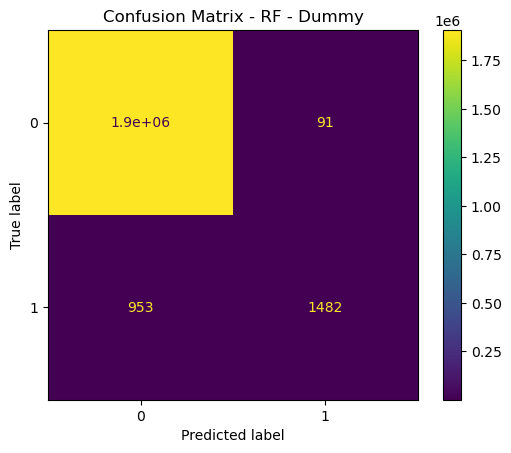

In [91]:
# Gráfico para matriz de confusão Random Forest

confusion_matrix_rf_dummy = confusion_matrix(Y_test_dummy, Y_pred_rf_dummy.round())

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf_dummy)
disp.plot()
plt.title('Confusion Matrix - RF - Dummy')
plt.show()

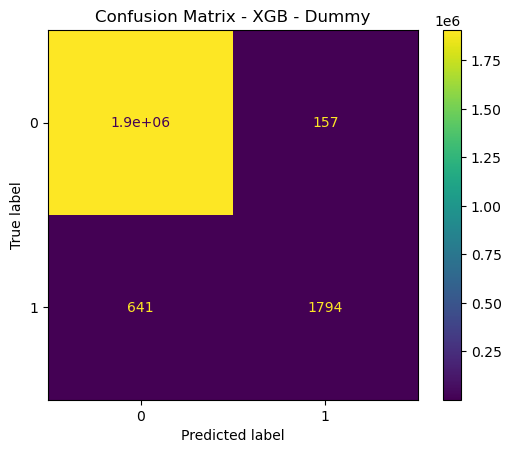

In [90]:
# Gráfico para matriz de confusão XGBoost 

confusion_matrix_xgb_dummy = confusion_matrix(Y_test_dummy, Y_pred_xgb_dummy.round())

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_xgb_dummy)
disp.plot()
plt.title('Confusion Matrix - XGB - Dummy')
plt.show()